C:\Users\USER-PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER-PC\AppData\Local\Temp\ipykernel_3268\1080159121.py:30: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecasted_df = pd.DataFrame(forecasted_values, columns=data.columns, index=pd.date_range(start=data.index[-1], periods=forecast_periods+1, closed='right'))


Forecasted Values:
                     Temperature      Pressure  Humidnity        IAQ
2023-10-11 16:59:00    39.694312  99927.693307  47.247345  96.987077
2023-10-12 16:59:00    39.649982  99923.831972  47.388258  96.912070
2023-10-13 16:59:00    39.593676  99919.687931  47.532455  96.849721
2023-10-14 16:59:00    39.551711  99915.586274  47.622888  96.814577
2023-10-15 16:59:00    39.513087  99911.566344  47.705942  96.780344
2023-10-16 16:59:00    39.474839  99907.552628  47.791303  96.744178
2023-10-17 16:59:00    39.438229  99903.536072  47.871773  96.710410


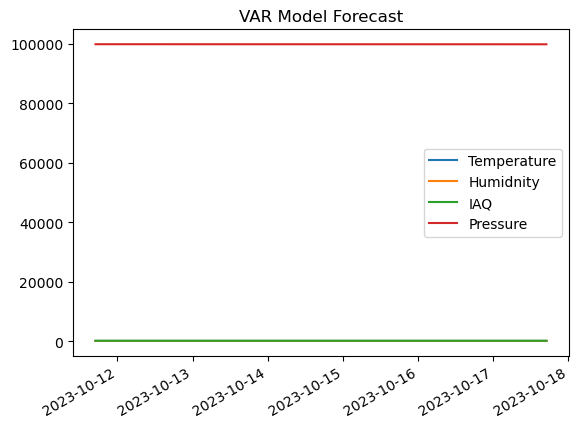

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Step 2: Load the dataset
data = pd.read_csv("iaq_middle5.csv")
data['Time'] = pd.to_datetime(data['Time'])
data.asfreq('h')
data.set_index('Time', inplace=True)

# Step 3: Preprocess the data if needed
# You may need to handle missing values or resample the data

# Step 4: Fit a VAR model
model = VAR(data)

# Specify the lag order for the VAR model (you can choose the appropriate order)
lag_order = 2
model_fitted = model.fit(lag_order)

# Step 5: Specify the number of periods to forecast
forecast_periods = 7  # Adjust the number of periods you want to forecast

# Step 6: Use the VAR model to make forecasts
forecasted_values = model_fitted.forecast(data.values[-lag_order:], steps=forecast_periods)

# Step 7: Visualize the forecasted values
forecasted_df = pd.DataFrame(forecasted_values, columns=data.columns, index=pd.date_range(start=data.index[-1], periods=forecast_periods+1, closed='right'))

# Print or plot the forecasted values
print("Forecasted Values:")
print(forecasted_df)

# You can also plot the forecasted values
forecasted_df[['Temperature', 'Humidnity', 'IAQ', 'Pressure']].plot()
plt.title('VAR Model Forecast')
plt.show()


In [3]:
data.head()

,Temperature,Pressure,Humidnity,IAQ
Time,,,,
2023-09-10 08:05:00,33.17,100465,73.09,85.97
2023-09-10 08:06:00,34.13,100461,67.54,88.52
2023-09-10 08:07:00,34.63,100461,66.44,88.85
2023-09-10 08:08:00,34.36,100466,66.50,88.96
2023-09-10 08:09:00,34.49,100464,66.16,89.11


In [24]:
np.asarray(data)

array([[3.31000e+01, 1.00465e+05, 7.46800e+01, 6.08100e+01],
       [3.31700e+01, 1.00465e+05, 7.30900e+01, 8.59700e+01],
       [3.33600e+01, 1.00465e+05, 7.22200e+01, 8.64200e+01],
       ...,
       [3.68000e+01, 1.00051e+05, 5.47300e+01, 9.38700e+01],
       [3.68300e+01, 1.00050e+05, 5.48100e+01, 9.38100e+01],
       [3.68700e+01, 1.00050e+05, 5.49200e+01, 9.38300e+01]])

In [12]:
print(data['dnt'].unique())

['09-Oct-2023 08:05:08' '09-Oct-2023 08:05:11' '09-Oct-2023 08:05:15' ...
 '09-Oct-2023 16:42:26' '09-Oct-2023 16:42:29' '09-Oct-2023 16:42:33']
